Setup

In [4]:
# Change working directory to project root
import os
os.chdir("C:/Users/saksh/Downloads/Cyberattack-Detection-ML")

# Add the 'scripts' directory to the system path
import sys
scripts_path = os.path.abspath("scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Now import functions from preprocess.py
from preprocess import load_and_merge_csv, clean_and_select_features


Import Required Libraries

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Load and Prepare the Data

In [5]:
df = load_and_merge_csv("data")
X, y = clean_and_select_features(df)

Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train Random Forest Model

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the Model

Accuracy Score: 0.9828263575540688

Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       0.99      0.98      0.99    454265
                       Bot       0.74      0.46      0.57       391
                      DDoS       1.00      1.00      1.00     25605
             DoS GoldenEye       0.97      0.97      0.97      2059
                  DoS Hulk       0.88      0.97      0.92     46025
          DoS Slowhttptest       0.93      0.92      0.93      1100
             DoS slowloris       1.00      0.99      0.99      1159
               FTP-Patator       0.99      0.99      0.99      1587
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.43      0.60         7
                  PortScan       0.99      1.00      1.00     31761
               SSH-Patator       1.00      0.52      0.69      1180
  Web Attack � Brute Force       0.18      0.18      0.

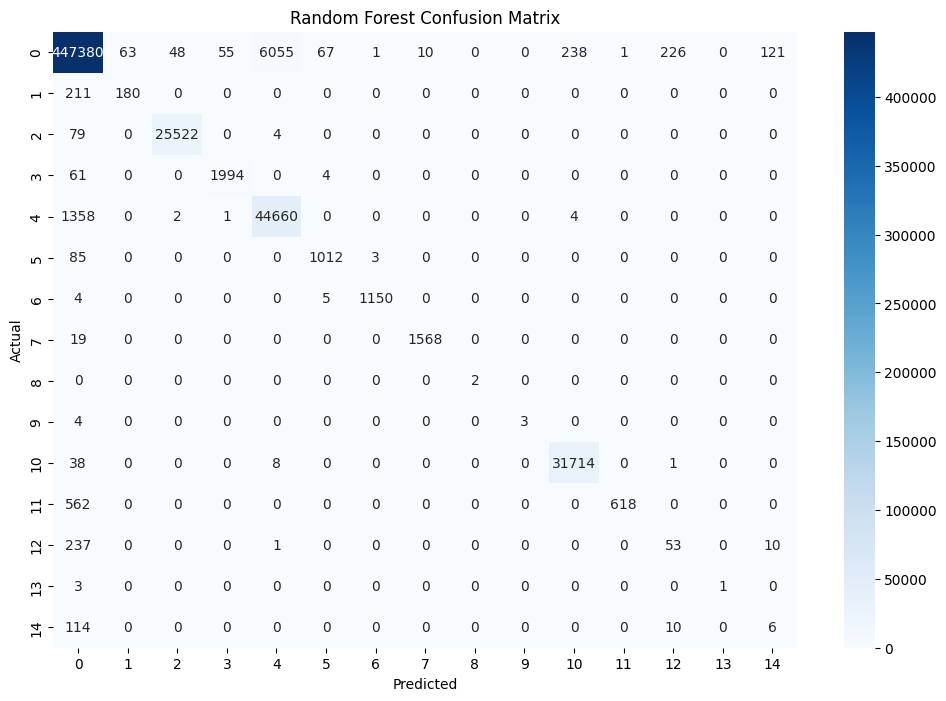

In [9]:
y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()